In [51]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path

# --- Locate and add the package root (GITTYSBURG) ---
# Adjust dynamically from current working directory
cwd = Path.cwd().resolve()
for parent in [cwd, *cwd.parents]:
    if (parent / "sociopathit").exists():
        ROOT = parent
        break
else:
    raise FileNotFoundError("❌ Could not locate the sociopathit package root.")

# Add to sys.path for imports
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

# Verify
print(f"✅ Added to sys.path:\n{ROOT}")


✅ Added to sys.path:
C:\Users\alecw\OneDrive - University of Toronto\Directives\GITTYSBURG\sociopathit


# Bar Charts

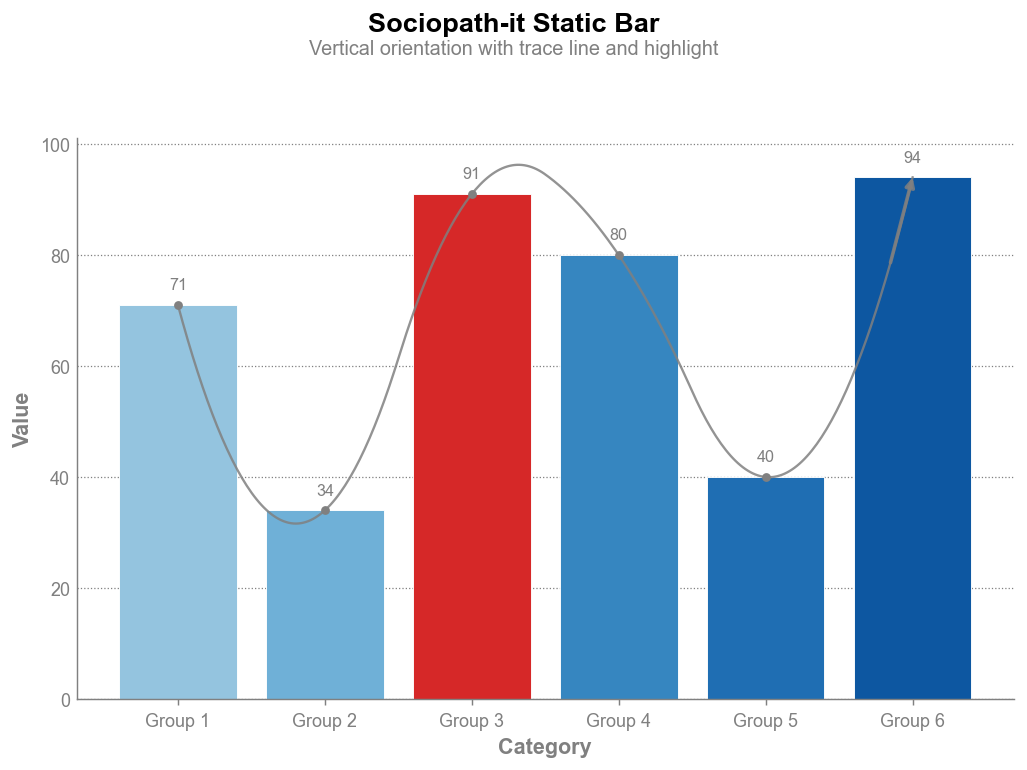

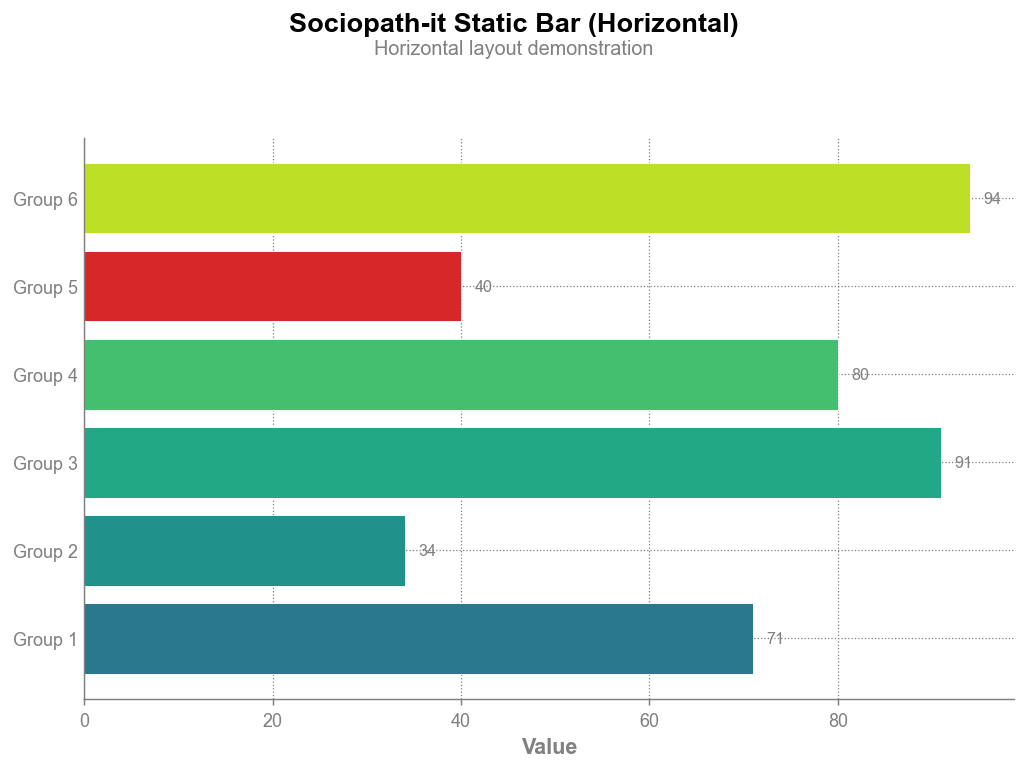

(<Figure size 1040x780 with 1 Axes>, <Axes: xlabel='Value'>)

In [52]:
import importlib
from sociopathit.visuals import bar as bar_module
importlib.reload(bar_module)
from sociopathit.visuals.bar import bar

# Simulate categorical data
np.random.seed(42)
df_test = pd.DataFrame({
    "Category": [f"Group {i}" for i in range(1, 7)],
    "Value": np.random.randint(20, 100, size=6)
})

# ─────────────────────────────────────────────
# Test 1: Static vertical bar
# ─────────────────────────────────────────────
bar(
    df=df_test,
    x="Category",
    y="Value",
    title="Sociopath-it Static Bar",
    subtitle="Vertical orientation with trace line and highlight",
    style_mode="plainjane",
    orientation="vertical",
    trace_line=True,
    trace_arrow=True,
    highlight="Group 3"
)

# ─────────────────────────────────────────────
# Test 2: Static horizontal bar
# ─────────────────────────────────────────────
bar(
    df=df_test,
    x="Category",
    y="Value",
    title="Sociopath-it Static Bar (Horizontal)",
    subtitle="Horizontal layout demonstration",
    orientation="horizontal",
    highlight="Group 5"
)

# Cluster Mapping

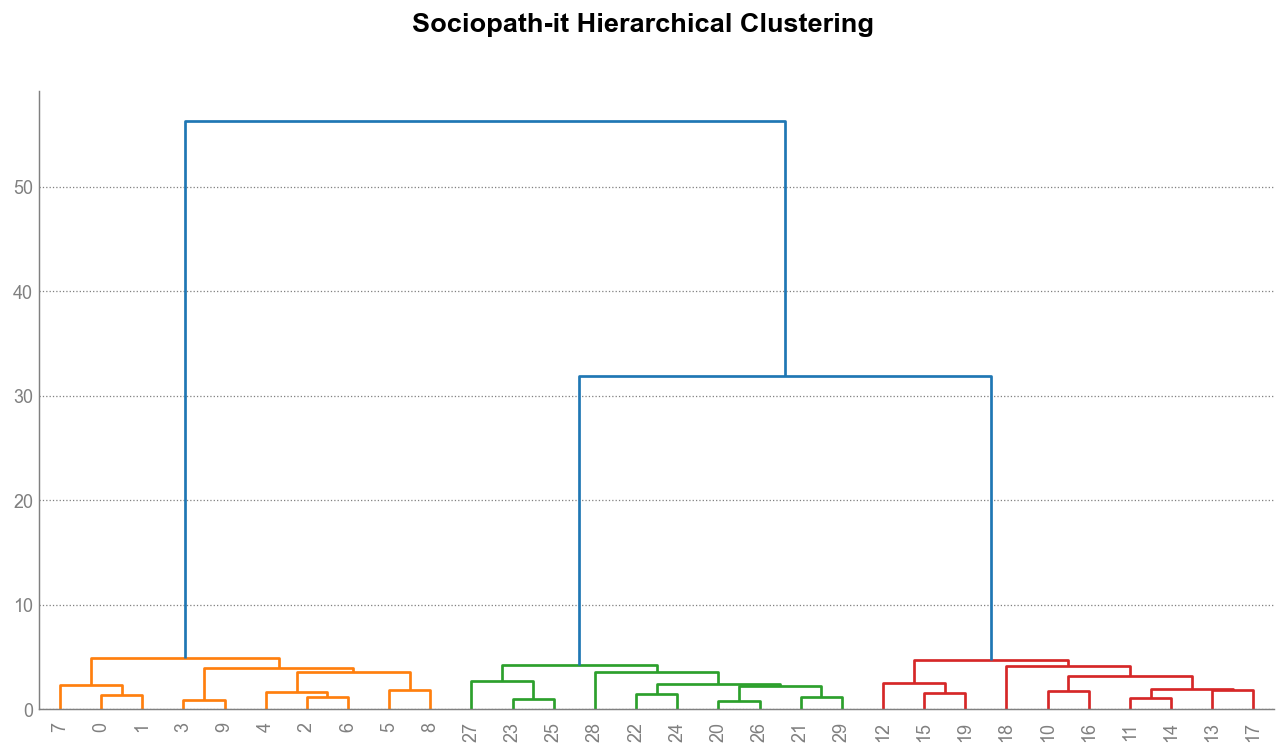

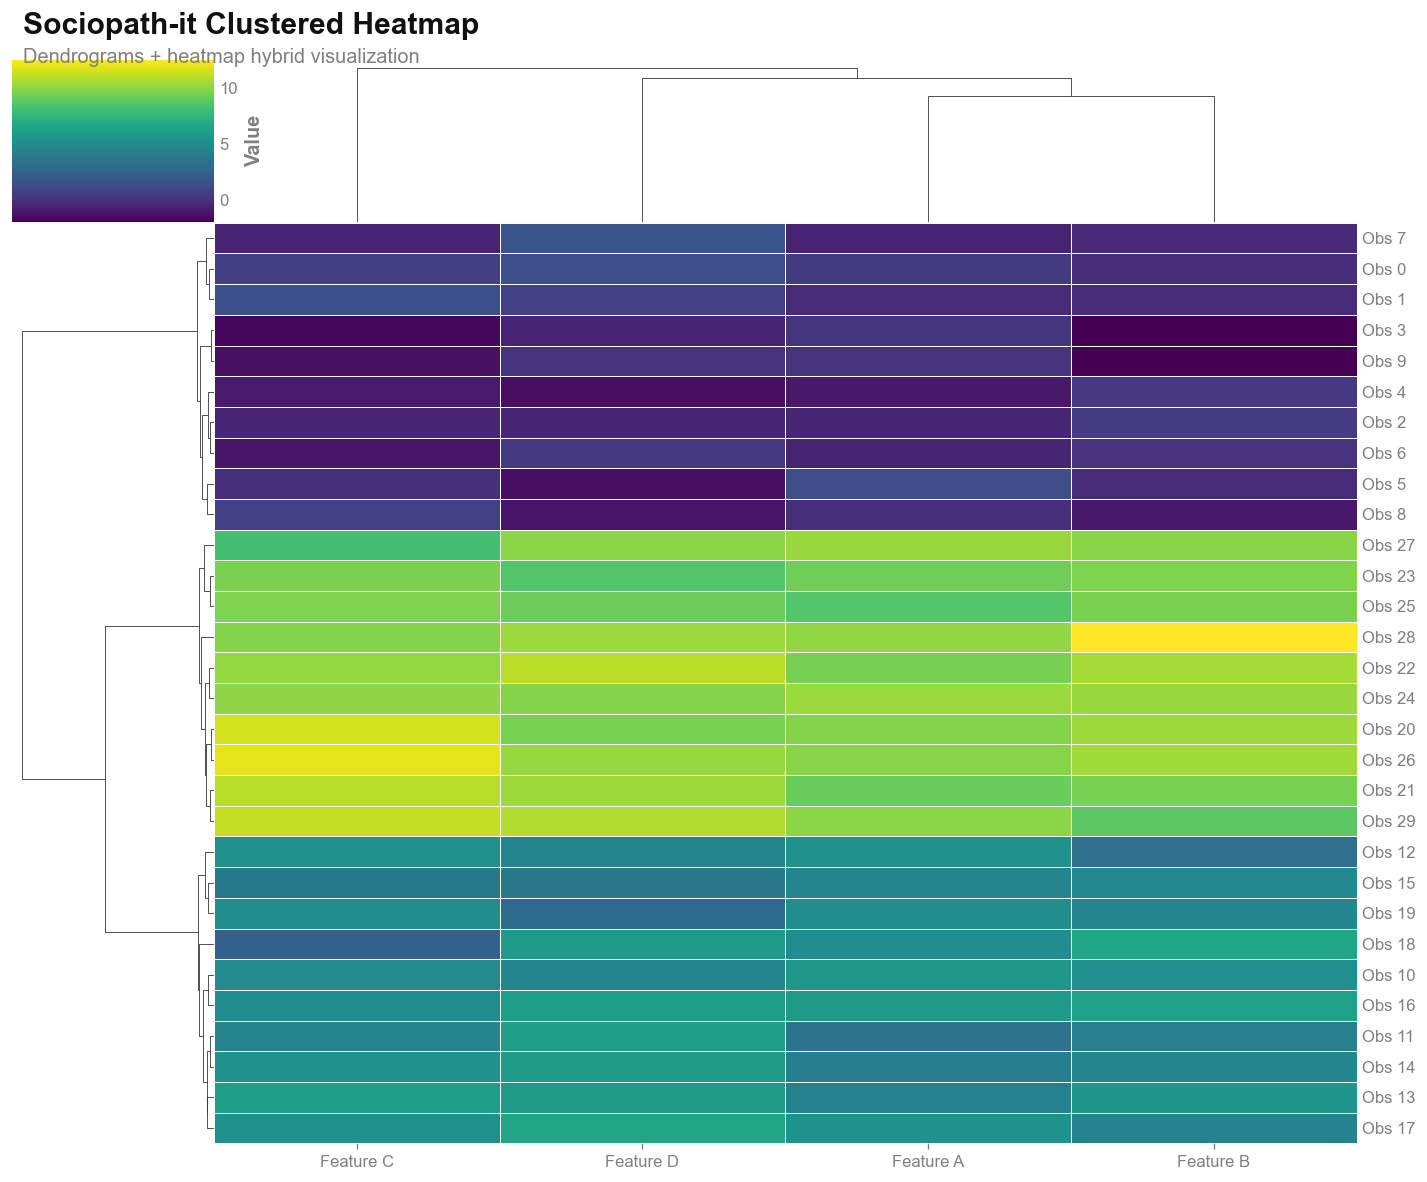

(<Figure size 1440x1200 with 4 Axes>, <Axes: >)

In [53]:
import pandas as pd
import numpy as np
import importlib
from sociopathit.visuals import cluster as cluster_module
importlib.reload(cluster_module)
from sociopathit.visuals.cluster import cluster, cluster_interactive, heatmap_cluster

# Simulate clustered numeric data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=0.0, scale=1.0, size=(10, 4)),
    np.random.normal(loc=5.0, scale=1.0, size=(10, 4)),
    np.random.normal(loc=10.0, scale=1.0, size=(10, 4)),
])
df_cluster = pd.DataFrame(data, columns=["Feature A", "Feature B", "Feature C", "Feature D"])
df_cluster.index = [f"Obs {i}" for i in range(len(df_cluster))]

# ─────────────────────────────────────────────
# Test 1: Static cluster dendrogram
# ─────────────────────────────────────────────
cluster(
    df=df_cluster,
    method="ward",
    metric="euclidean",
    color_threshold=15,
    title="Sociopath-it Hierarchical Clustering",
)

# ─────────────────────────────────────────────
# Test 2: Interactive version
# ─────────────────────────────────────────────
fig = cluster_interactive(
    df=df_cluster,
    method="average",
    metric="euclidean",
    title="Interactive Sociopath-it Cluster Dendrogram",
    subtitle="Average linkage example",
)
fig.show()

# ─────────────────────────────────────────────
# Test 3: NEW Heatmap-Cluster Hybrid
# ─────────────────────────────────────────────
heatmap_cluster(
    df=df_cluster,
    method="ward",
    metric="euclidean",
    title="Sociopath-it Clustered Heatmap",
    subtitle="Dendrograms + heatmap hybrid visualization",
    style_mode="viridis",
    cmap="viridis",
    annot=False,
    figsize=(12, 10),
)

# Coefficient Plot

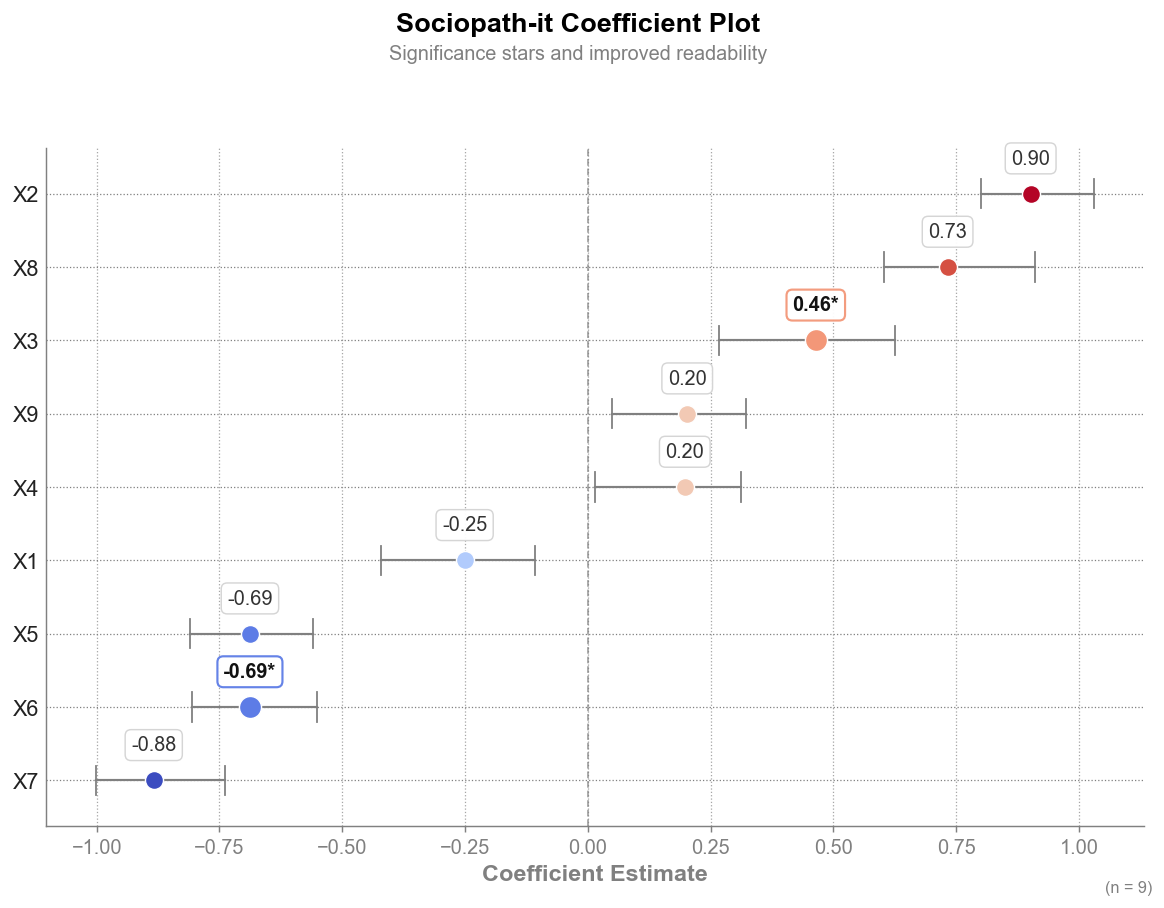

In [54]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import coef as coef_module

importlib.reload(coef_module)
from sociopathit.visuals.coef import coef, coef_interactive

np.random.seed(42)
terms = [f"X{i}" for i in range(1, 10)]
est = np.random.uniform(-1.0, 1.0, len(terms))
lo = est - np.random.uniform(0.1, 0.2, len(terms))
hi = est + np.random.uniform(0.1, 0.2, len(terms))
pvals = np.random.uniform(0.001, 0.3, len(terms))
groups = ["Set A"] * 3 + ["Set B"] * 3 + ["Set C"] * 3

df_coef = pd.DataFrame({
    "term": terms,
    "estimate": est,
    "conf.low": lo,
    "conf.high": hi,
    "p.value": pvals,
    "group": groups,
})

coef(
    df=df_coef,
    group_col="group",
    p_col="p.value",
    ci_style="bracket",
    color_mode="continuous",
    title="Sociopath-it Coefficient Plot",
    subtitle="Significance stars and improved readability",
)

fig = coef_interactive(
    df=df_coef,
    group_col="group",
    p_col="p.value",
    ci_style="spike",
    color_mode="continuous",
    title="Interactive Sociopath-it Coefficient Plot",
    subtitle="Bold significant coefs with stars",
)
fig.show()

# Co-Occurrence Networks

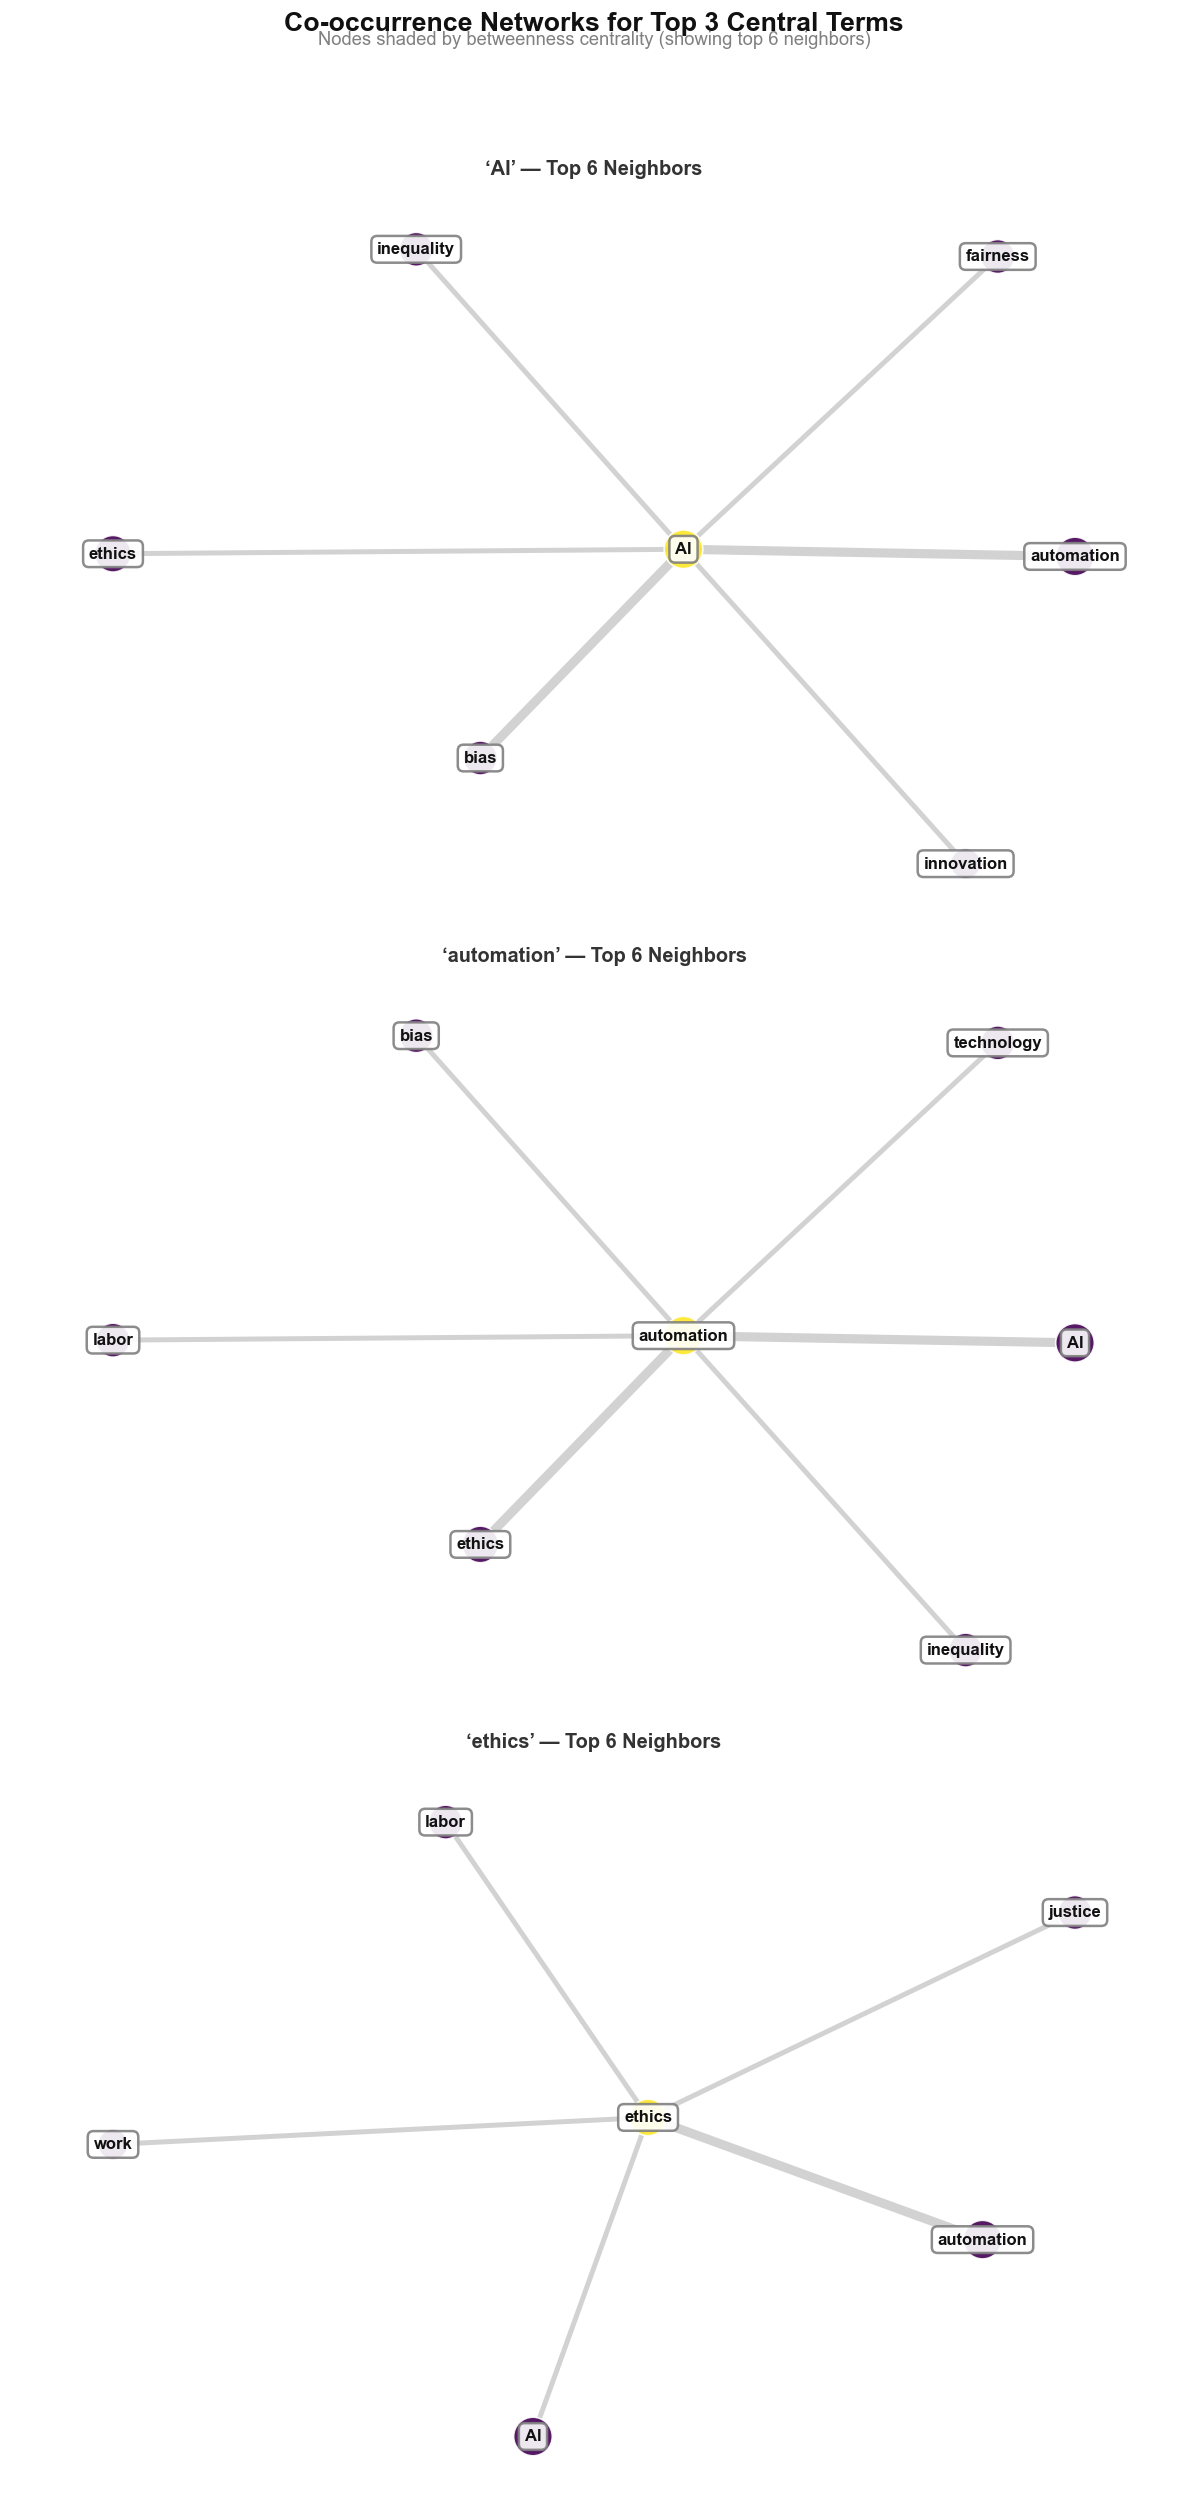

In [55]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import cooccur as cooccur_module

importlib.reload(cooccur_module)
from sociopathit.visuals.cooccur import cooccur, cooccur_interactive

# Example dataset
data = {
    "keywords": [
        "AI, automation, ethics",
        "technology, labor, automation",
        "AI, fairness, bias",
        "inequality, justice, fairness",
        "AI, inequality, automation, bias",
        "ethics, work, automation",
        "labor, justice, ethics",
        "AI, technology, innovation",
    ]
}
df_terms = pd.DataFrame(data)

# ─────────────────────────────────────────────
# Static version
# ─────────────────────────────────────────────
cooccur(
    df=df_terms,
    term_col="keywords",
    top_n=3,
    max_neighbors=6,
    style="reviewer3",
)

# ─────────────────────────────────────────────
# Interactive version
# ─────────────────────────────────────────────
fig = cooccur_interactive(
    df=df_terms,
    term_col="keywords",
    top_n=3,
    max_neighbors=5,
)
fig.show()


# Factor Mapping

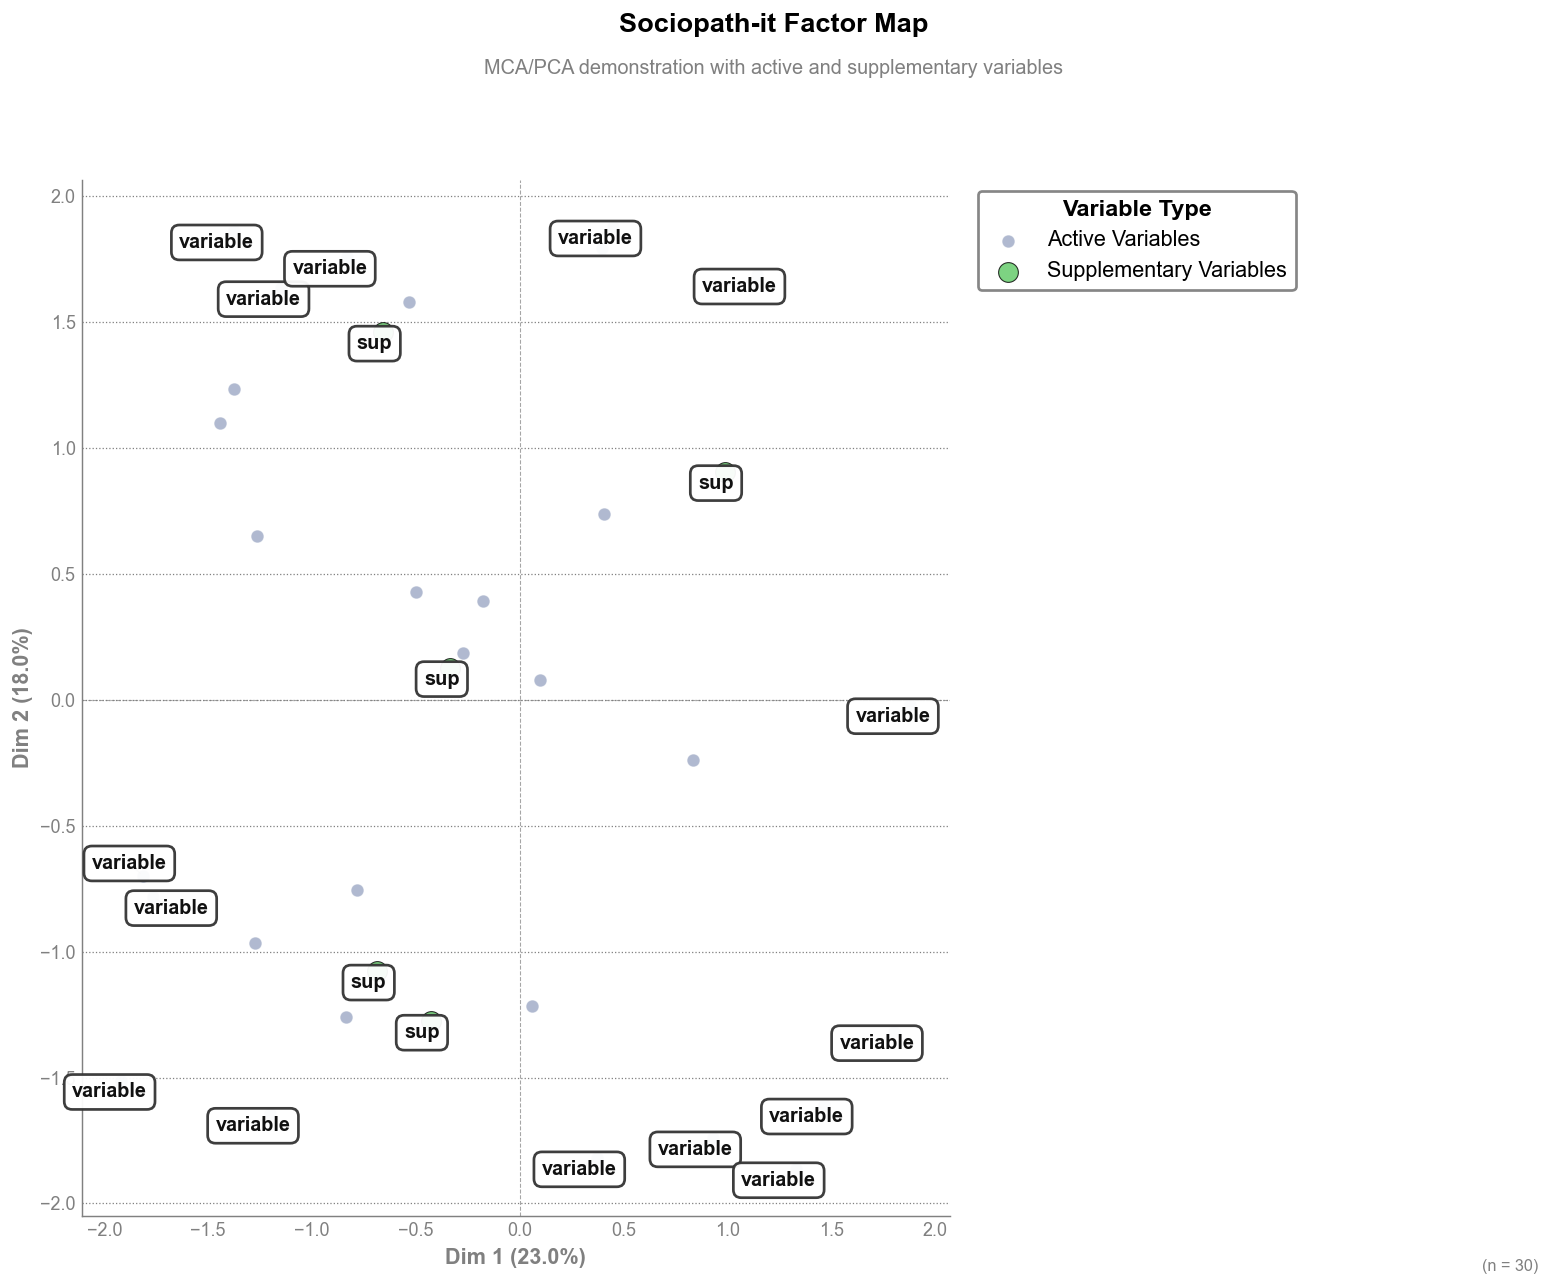

In [56]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import factormap as factormap_module

importlib.reload(factormap_module)
from sociopathit.visuals.factormap import factormap, factormap_interactive

# Simulate 2D factor analysis coordinates
np.random.seed(42)
n_vars = 30
active_coords = pd.DataFrame({
    0: np.random.uniform(-2, 2, n_vars),
    1: np.random.uniform(-2, 2, n_vars),
}, index=[f"Variable_{i}" for i in range(n_vars)])

sup_coords = pd.DataFrame({
    0: np.random.uniform(-1.5, 1.5, 5),
    1: np.random.uniform(-1.5, 1.5, 5),
}, index=[f"Sup_{i}" for i in range(5)])

# ─────────────────────────────────────────────
# Test 1: UPDATED Static factor map with improved legend
# ─────────────────────────────────────────────
factormap(
    active_coords=active_coords,
    sup_coords=sup_coords,
    title="Sociopath-it Factor Map",
    subtitle="MCA/PCA demonstration with active and supplementary variables",
    style_mode="viridis",
    label_filter=15,
    perc_var=(0.23, 0.18),
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive version
# ─────────────────────────────────────────────
fig = factormap_interactive(
    active_coords=active_coords,
    sup_coords=sup_coords,
    title="Interactive Sociopath-it Factor Map",
    subtitle="Hover for variable details",
    style_mode="sentiment",
    label_filter=15,
    perc_var=(0.23, 0.18),
)
fig.show()

# Heatmap

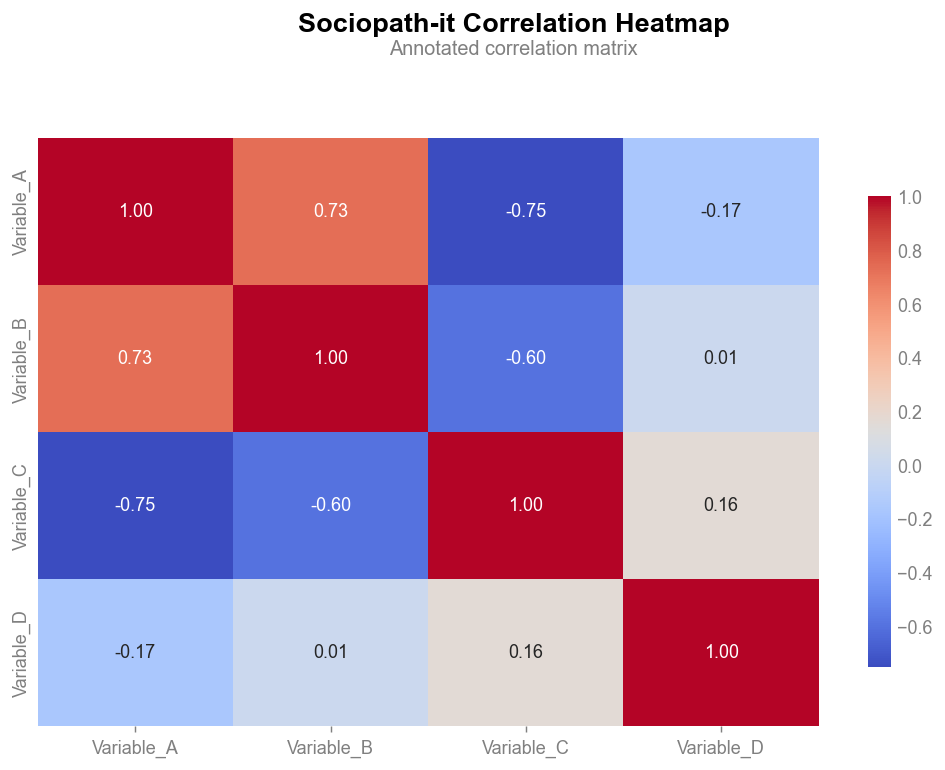

In [57]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import heatmap as heatmap_module

importlib.reload(heatmap_module)
from sociopathit.visuals.heatmap import heatmap, heatmap_interactive

# Simulate correlated numeric data
np.random.seed(42)
n_samples = 100
df_heat = pd.DataFrame({
    "Variable_A": np.random.normal(0, 1, n_samples),
    "Variable_B": np.random.normal(0, 1, n_samples),
    "Variable_C": np.random.normal(0, 1, n_samples),
    "Variable_D": np.random.normal(0, 1, n_samples),
})
df_heat["Variable_B"] = df_heat["Variable_A"] * 0.7 + np.random.normal(0, 0.5, n_samples)
df_heat["Variable_C"] = df_heat["Variable_A"] * -0.5 + np.random.normal(0, 0.5, n_samples)

# ─────────────────────────────────────────────
# Test 1: Static correlation heatmap
# ─────────────────────────────────────────────
heatmap(
    df=df_heat,
    title="Sociopath-it Correlation Heatmap",
    subtitle="Annotated correlation matrix",
    cmap="coolwarm",
    annot=True,
    style_mode="plainjane",
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive heatmap
# ─────────────────────────────────────────────
fig = heatmap_interactive(
    df=df_heat,
    title="Interactive Sociopath-it Heatmap",
    subtitle="Hover for correlation values",
    cmap="viridis",
)
fig.show()

# Histogram

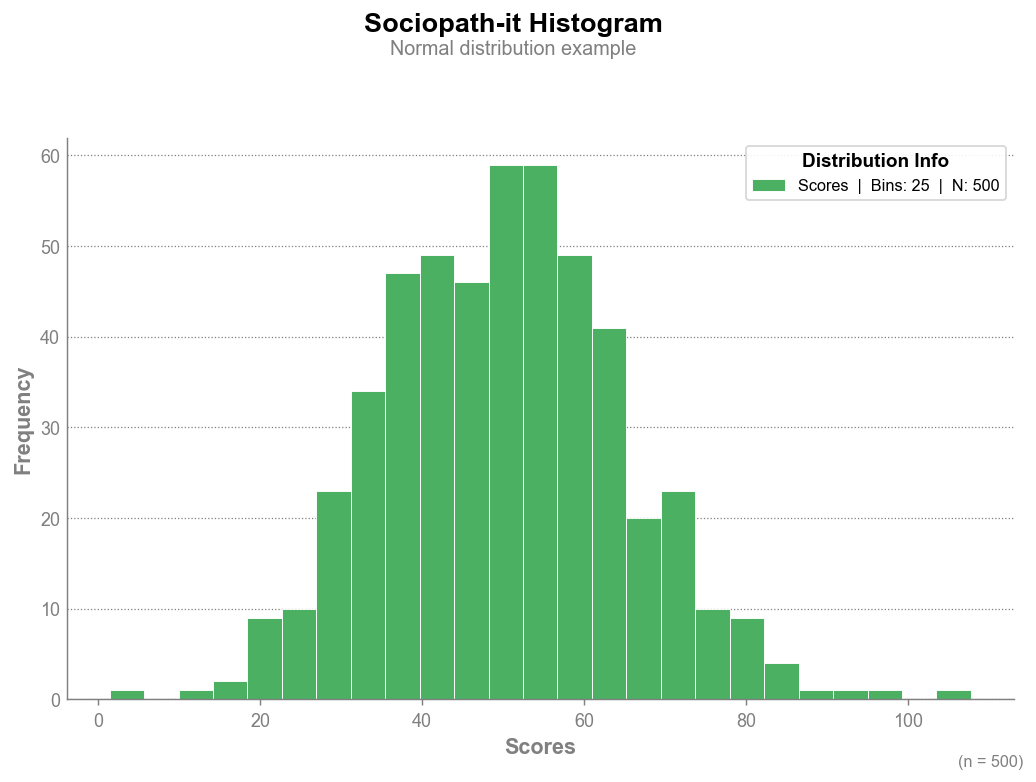

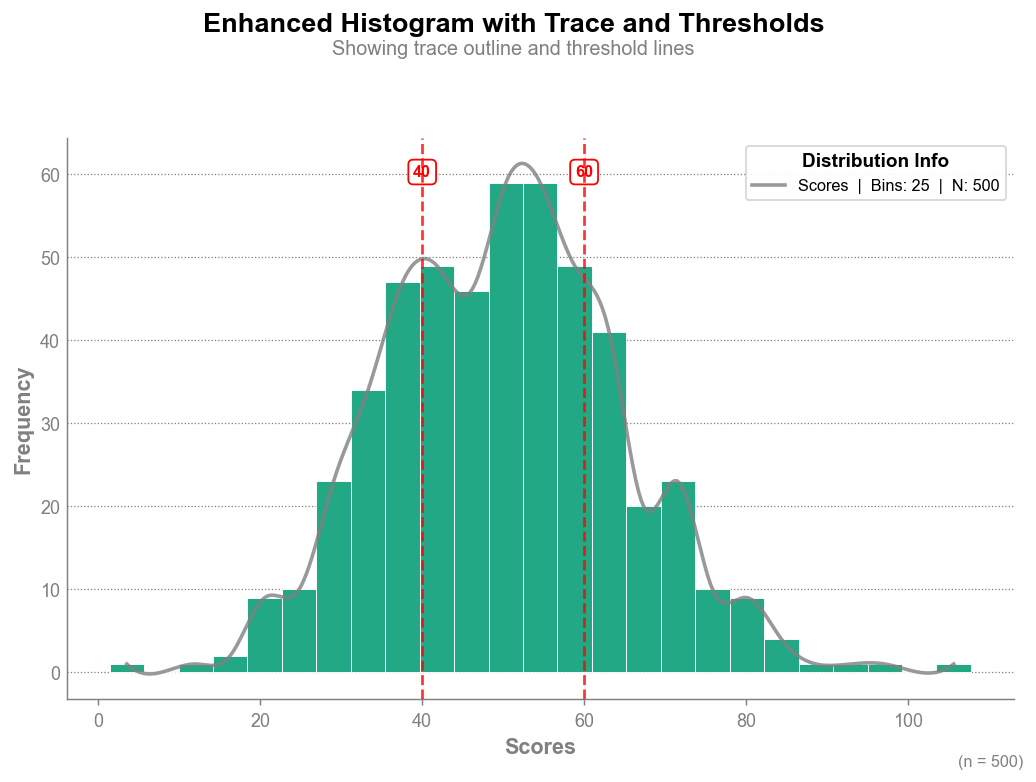

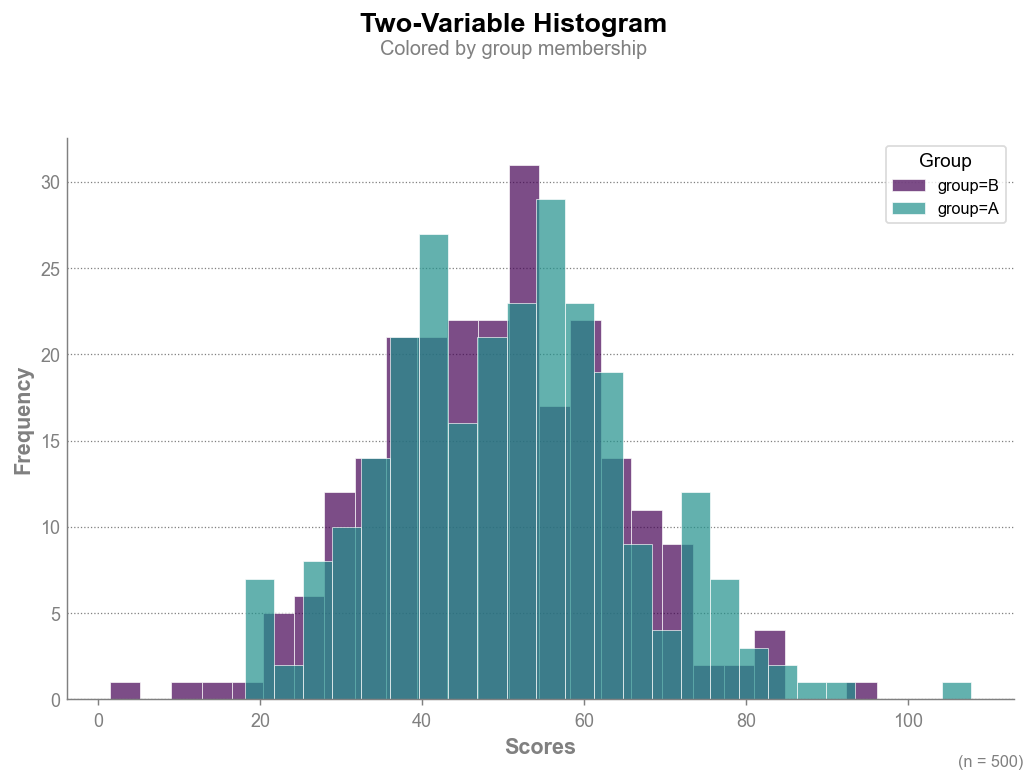

In [58]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import hist as hist_module

importlib.reload(hist_module)
from sociopathit.visuals.hist import histogram, histogram_interactive

# Simulate continuous distribution
np.random.seed(42)
df_hist = pd.DataFrame({
    "scores": np.random.normal(loc=50, scale=15, size=500),
    "group": np.random.choice(["A", "B"], size=500)
})

# ─────────────────────────────────────────────
# Test 1: Basic histogram with legend
# ─────────────────────────────────────────────
histogram(
    df=df_hist,
    x="scores",
    bins=25,
    title="Sociopath-it Histogram",
    subtitle="Normal distribution example",
    style_mode="sentiment",
    show_legend=True,
)

# ─────────────────────────────────────────────
# Test 2: NEW Enhanced histogram with trace outline and thresholds
# ─────────────────────────────────────────────
histogram(
    df=df_hist,
    x="scores",
    bins=25,
    title="Enhanced Histogram with Trace and Thresholds",
    subtitle="Showing trace outline and threshold lines",
    style_mode="viridis",
    trace_outline=True,
    thresholds=[40, 60],
    show_legend=True,
)

# ─────────────────────────────────────────────
# Test 3: NEW Two-variable coloring
# ─────────────────────────────────────────────
histogram(
    df=df_hist,
    x="scores",
    bins=25,
    color_by="group",
    title="Two-Variable Histogram",
    subtitle="Colored by group membership",
    style_mode="plainjane",
    show_legend=True,
)

# ─────────────────────────────────────────────
# Test 4: NEW Interactive version
# ─────────────────────────────────────────────
fig = histogram_interactive(
    df=df_hist,
    x="scores",
    bins=25,
    title="Interactive Sociopath-it Histogram",
    subtitle="Hover for bin details",
    style_mode="fiery",
)
fig.show()

# Pie Chart

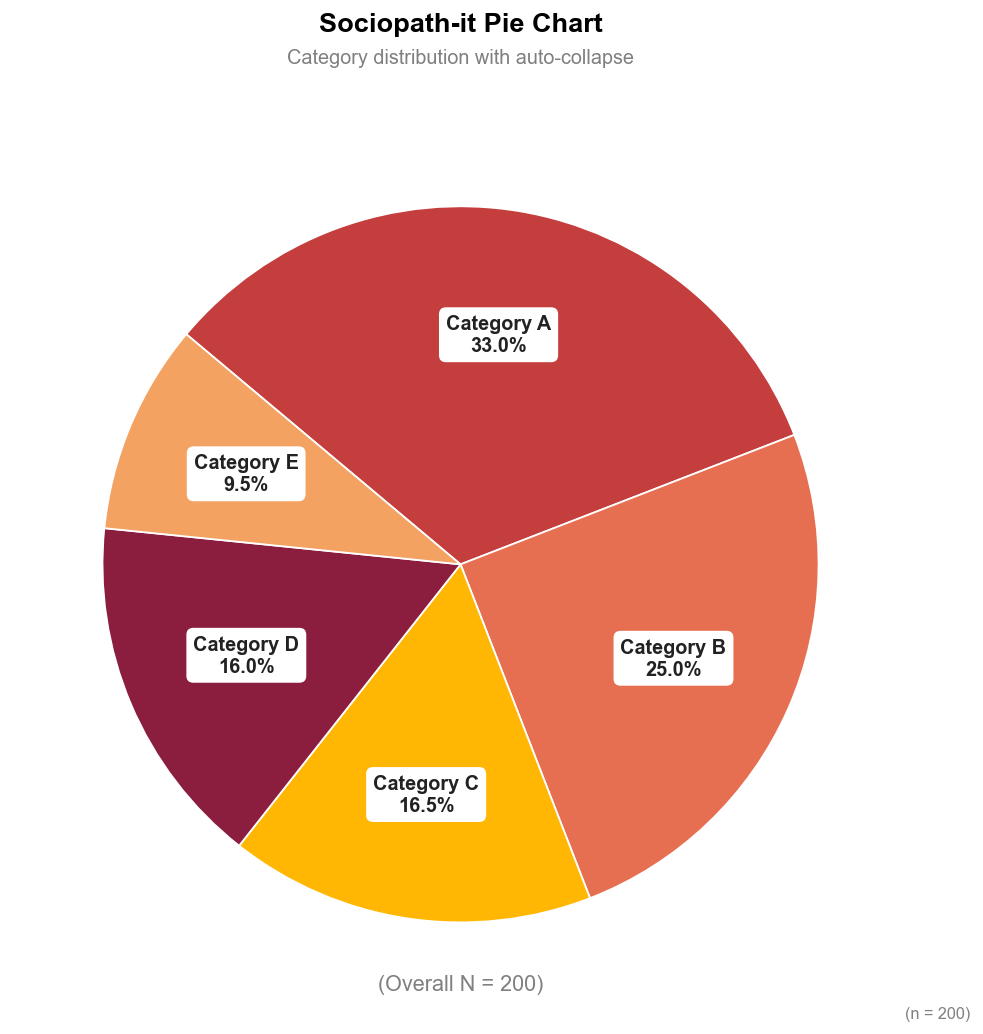

In [59]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import pie as pie_module

importlib.reload(pie_module)
from sociopathit.visuals.pie import pie, pie_interactive

# Simulate categorical data
np.random.seed(42)
categories = ["Category A", "Category B", "Category C", "Category D", "Category E"]
df_pie = pd.DataFrame({
    "category": np.random.choice(categories, size=200, p=[0.3, 0.25, 0.2, 0.15, 0.1])
})

# ─────────────────────────────────────────────
# Test 1: Static pie chart
# ─────────────────────────────────────────────
pie(
    df=df_pie,
    category_col="category",
    title="Sociopath-it Pie Chart",
    subtitle="Category distribution with auto-collapse",
    style_mode="fiery",
    min_pct=0.05,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive pie chart
# ─────────────────────────────────────────────
fig = pie_interactive(
    df=df_pie,
    category_col="category",
    title="Interactive Sociopath-it Pie Chart",
    subtitle="Hover for category details",
    style_mode="sentiment",
    min_pct=0.05,
)
fig.show()

# Scatter Plot

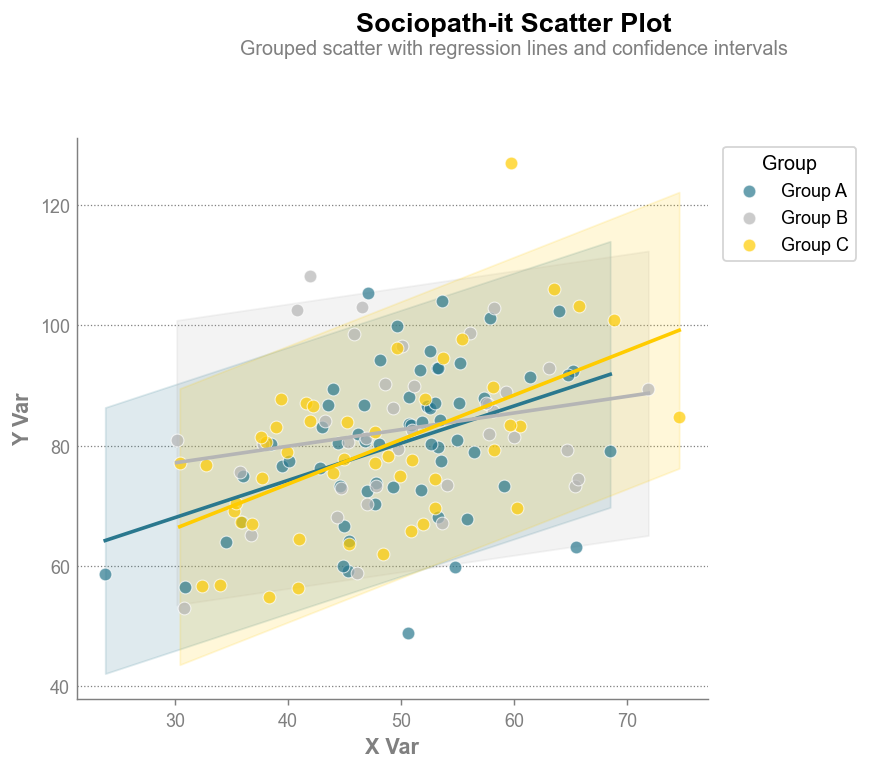

In [60]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import scatter as scatter_module

importlib.reload(scatter_module)
from sociopathit.visuals.scatter import scatterplot, scatterplot_interactive

# Simulate scatter data with groups
np.random.seed(42)
n = 150
df_scatter = pd.DataFrame({
    "x_var": np.random.normal(50, 10, n),
    "y_var": np.random.normal(50, 10, n),
    "group": np.random.choice(["Group A", "Group B", "Group C"], n)
})
df_scatter["y_var"] = df_scatter["y_var"] + 0.6 * df_scatter["x_var"] + np.random.normal(0, 5, n)

# ─────────────────────────────────────────────
# Test 1: Static scatter plot with groups
# ─────────────────────────────────────────────
scatterplot(
    df=df_scatter,
    x="x_var",
    y="y_var",
    group="group",
    title="Sociopath-it Scatter Plot",
    subtitle="Grouped scatter with regression lines and confidence intervals",
    style_mode="viridis",
    ci=True,
    line=True,
    alpha=0.7,
)

# ─────────────────────────────────────────────
# Test 2: NEW Interactive scatter plot
# ─────────────────────────────────────────────
fig = scatterplot_interactive(
    df=df_scatter,
    x="x_var",
    y="y_var",
    group="group",
    title="Interactive Sociopath-it Scatter Plot",
    subtitle="Hover for point details with regression lines",
    style_mode="plainjane",
    line=True,
)
fig.show()

# Trend Plot

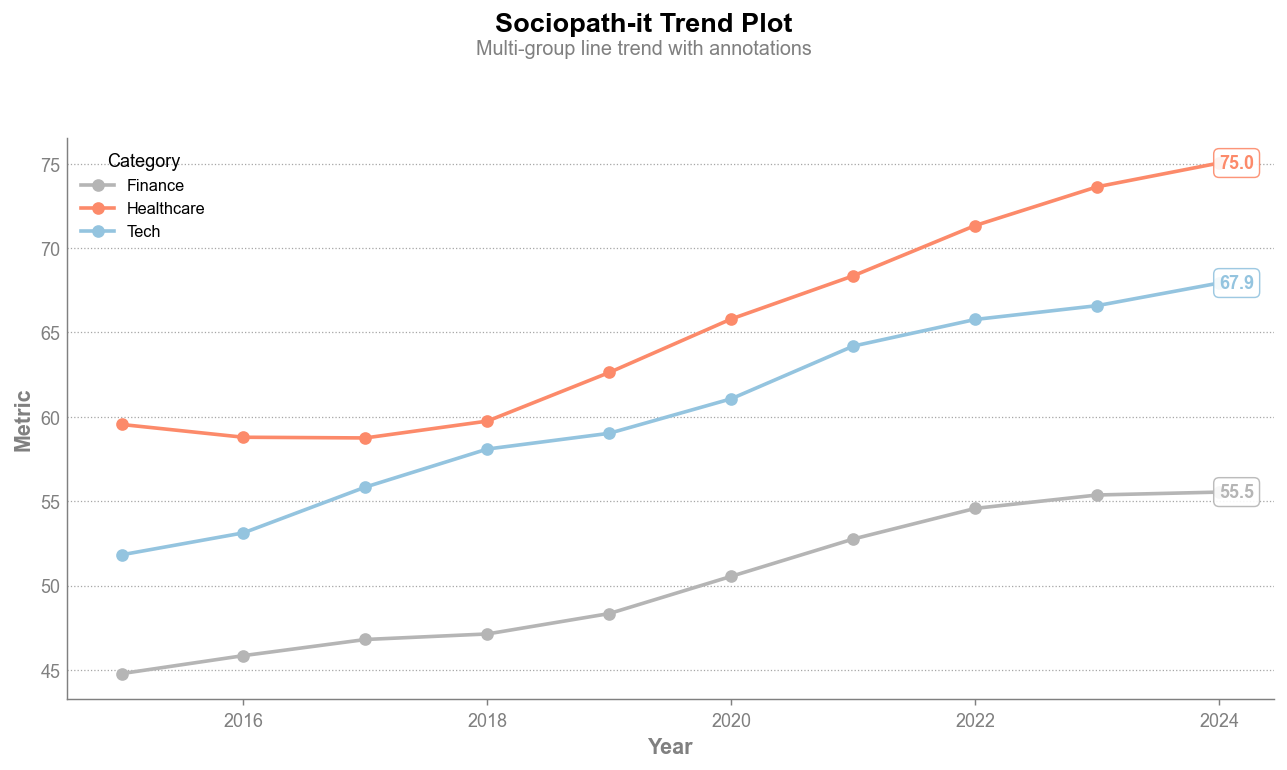

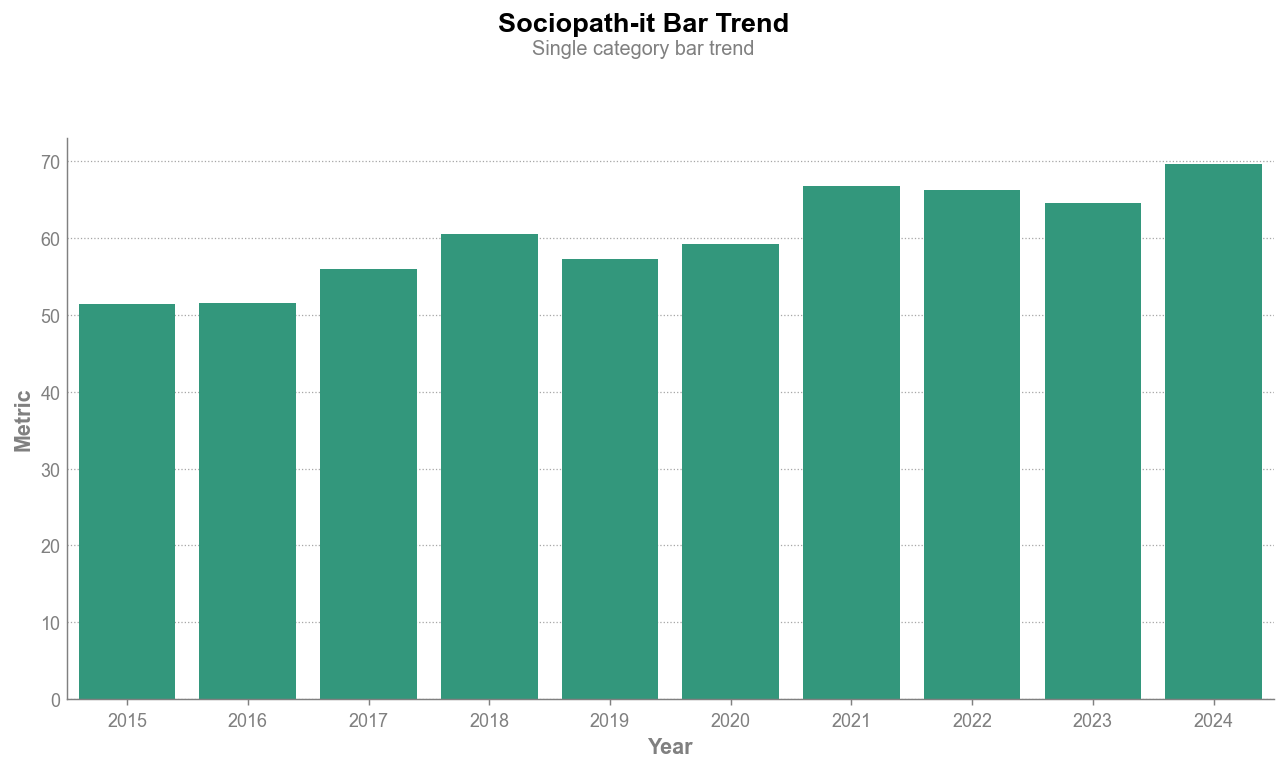

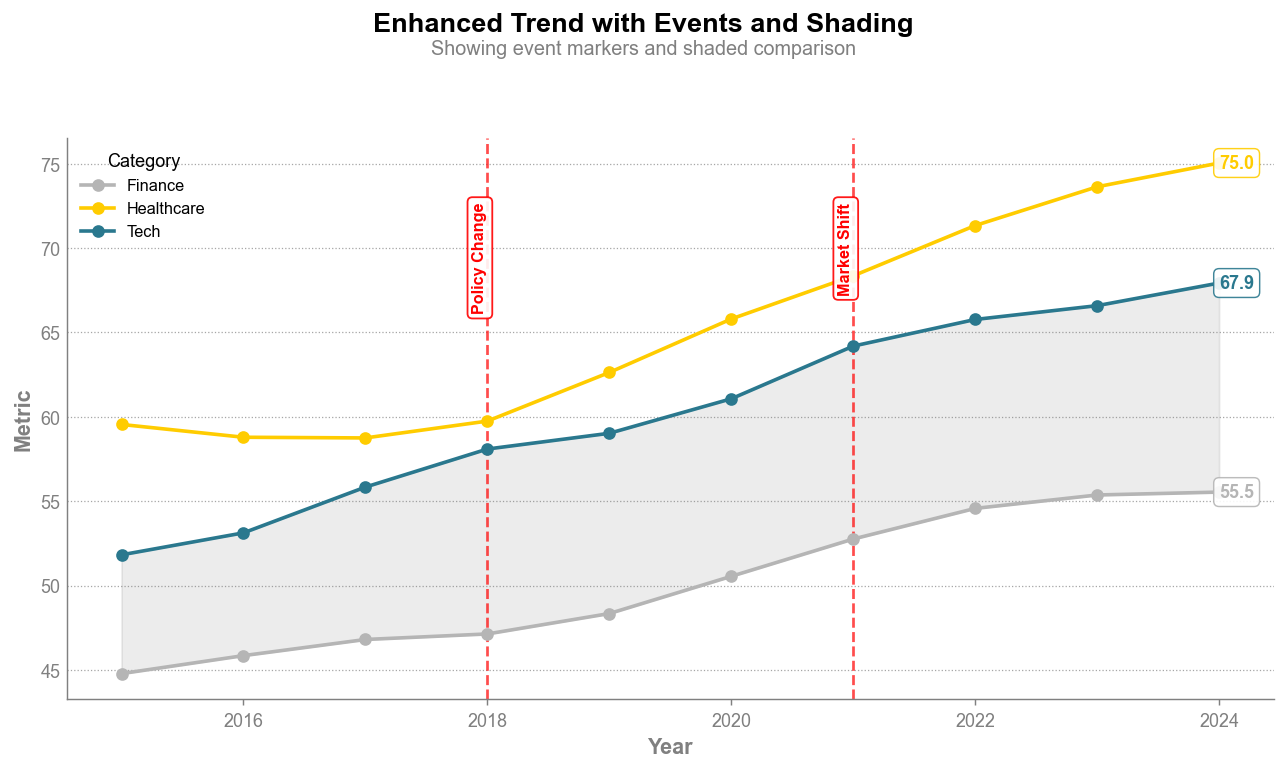

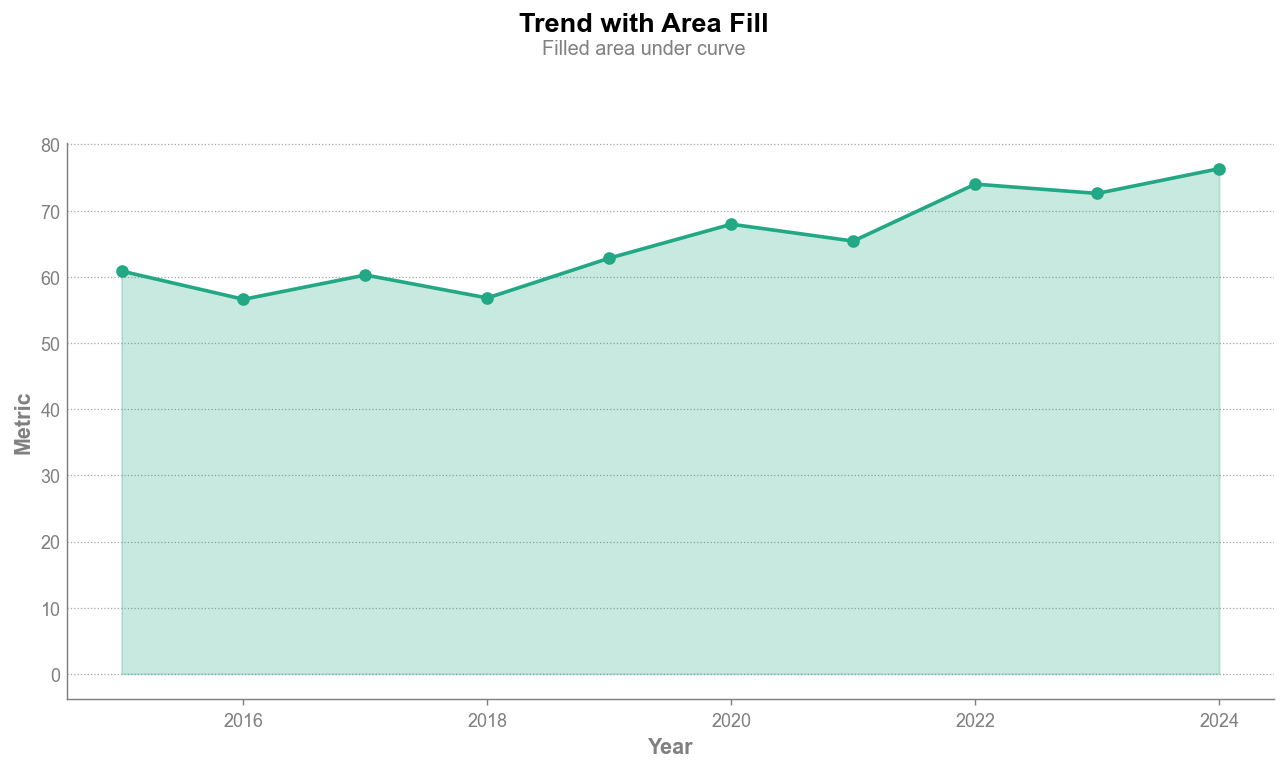

In [61]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import trend as trend_module

importlib.reload(trend_module)
from sociopathit.visuals.trend import trend, trend_interactive

# Simulate time series data
np.random.seed(42)
years = list(range(2015, 2025))
df_trend = pd.DataFrame({
    "year": years * 3,
    "metric": np.concatenate([
        50 + np.arange(10) * 2 + np.random.normal(0, 3, 10),
        45 + np.arange(10) * 1.5 + np.random.normal(0, 2, 10),
        55 + np.arange(10) * 2.5 + np.random.normal(0, 4, 10),
    ]),
    "category": ["Tech"] * 10 + ["Finance"] * 10 + ["Healthcare"] * 10,
})

# ─────────────────────────────────────────────
# Test 1: Line trend with groups
# ─────────────────────────────────────────────
trend(
    df=df_trend,
    x="year",
    y="metric",
    group="category",
    kind="line",
    title="Sociopath-it Trend Plot",
    subtitle="Multi-group line trend with annotations",
    style_mode="plainjane",
    smooth=True,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 2: Bar trend
# ─────────────────────────────────────────────
trend(
    df=df_trend[df_trend["category"] == "Tech"],
    x="year",
    y="metric",
    kind="bar",
    title="Sociopath-it Bar Trend",
    subtitle="Single category bar trend",
    style_mode="sentiment",
)

# ─────────────────────────────────────────────
# Test 3: NEW Enhanced trend with event lines and shading
# ─────────────────────────────────────────────
trend(
    df=df_trend,
    x="year",
    y="metric",
    group="category",
    kind="line",
    title="Enhanced Trend with Events and Shading",
    subtitle="Showing event markers and shaded comparison",
    style_mode="viridis",
    smooth=True,
    event_lines={2018: "Policy Change", 2021: "Market Shift"},
    shade_between=["Tech", "Finance"],
)

# ─────────────────────────────────────────────
# Test 4: NEW Trend with area fill
# ─────────────────────────────────────────────
trend(
    df=df_trend[df_trend["category"] == "Healthcare"],
    x="year",
    y="metric",
    kind="line",
    title="Trend with Area Fill",
    subtitle="Filled area under curve",
    style_mode="fiery",
    fill_area=True,
    annotate=True,
)

# ─────────────────────────────────────────────
# Test 5: NEW Interactive trend
# ─────────────────────────────────────────────
fig = trend_interactive(
    df=df_trend,
    x="year",
    y="metric",
    group="category",
    title="Interactive Sociopath-it Trend Plot",
    subtitle="Hover for data points",
    style_mode="sentiment",
)
fig.show()

# Waterfall Chart

In [62]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import waterfall as waterfall_module

importlib.reload(waterfall_module)
from sociopathit.visuals.waterfall import waterfall, waterfall_interactive

# Simulate cumulative impact data
df_waterfall = pd.DataFrame({
    "stage": ["Q1", "Q2", "Q3", "Q4"],
    "revenue": [100, 120, 115, 140]
})

# ─────────────────────────────────────────────
# Test 1: UPDATED Waterfall with connector lines
# ─────────────────────────────────────────────


fig.show()

# Word Cloud

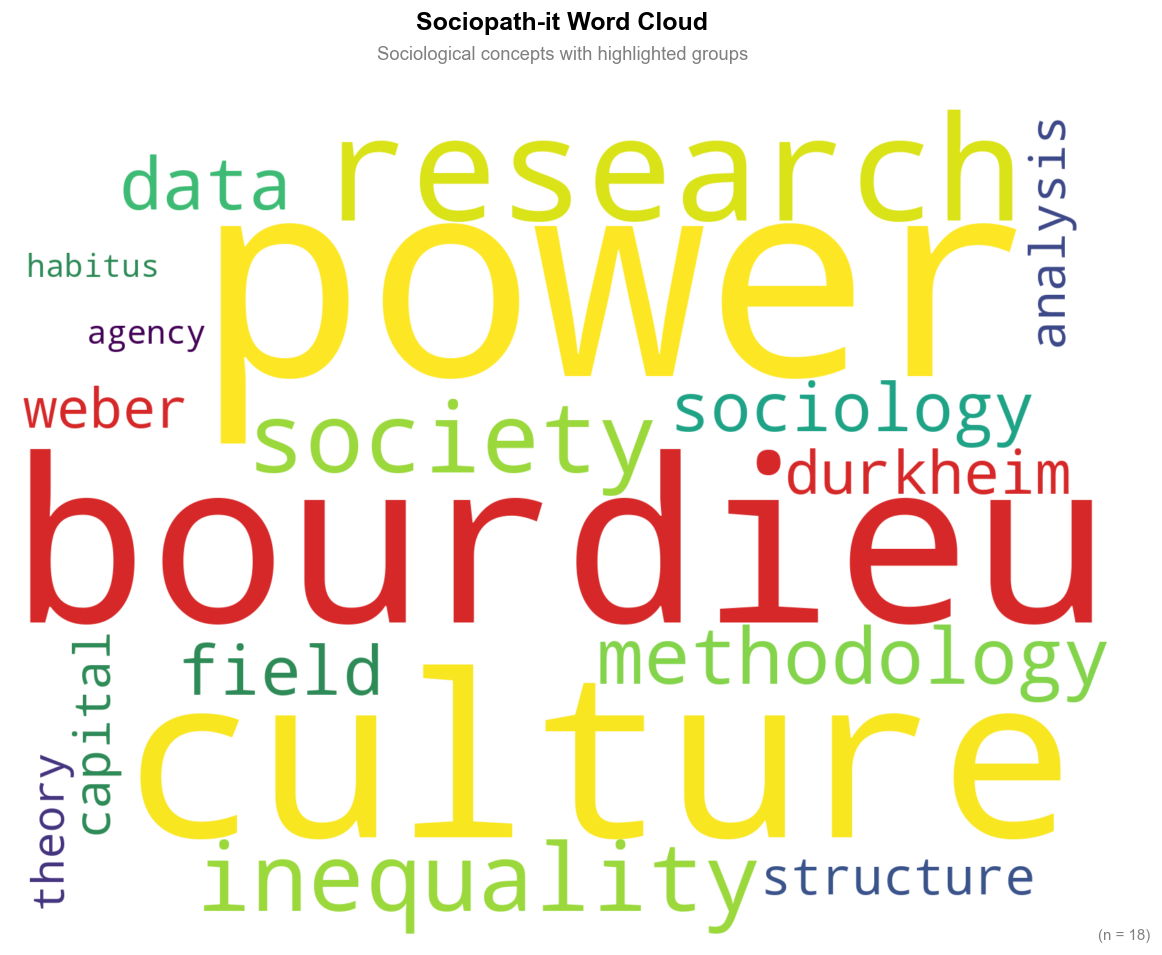

In [63]:
import importlib, pandas as pd, numpy as np
from sociopathit.visuals import wordcloud as wordcloud_module

importlib.reload(wordcloud_module)
from sociopathit.visuals.wordcloud import wordcloud, wordcloud_interactive

# Simulate word frequency data
np.random.seed(42)
words = ["sociology", "theory", "methodology", "data", "analysis", "research", 
         "culture", "society", "inequality", "power", "structure", "agency",
         "capital", "field", "habitus", "bourdieu", "weber", "durkheim"]
freq_dict = {word: np.random.randint(10, 100) for word in words}

# Highlight groups
highlight_groups = {
    "Key Theorists": {
        "color": "#D62828",
        "words": ["bourdieu", "weber", "durkheim"]
    },
    "Core Concepts": {
        "color": "#2E8B57",
        "words": ["capital", "field", "habitus"]
    }
}

# ─────────────────────────────────────────────
# Test 1: Static wordcloud
# ─────────────────────────────────────────────
wordcloud(
    freq_dict=freq_dict,
    title="Sociopath-it Word Cloud",
    subtitle="Sociological concepts with highlighted groups",
    style_mode="viridis",
    highlight_groups=highlight_groups,
    use_gradient=True,
    max_words=50,
)

# ─────────────────────────────────────────────
# Test 2: Interactive wordcloud
# ─────────────────────────────────────────────
fig = wordcloud_interactive(
    freq_dict=freq_dict,
    title="Interactive Sociopath-it Word Cloud",
    style_mode="viridis",
    highlight_groups=highlight_groups,
    use_gradient=True,
    exact_words=18,
)
fig.show()